In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# what we will do
# 1.data cleaning
# 2.EDA
# 3.text preprocessing
# 4.model buinding
# 5.evaluation
# 6.improvement


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# data cleaning

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder( )

In [6]:
data['Category']=encoder.fit_transform(data['Category'])

In [7]:
data.sample(3)

,Category,Message
2408,0,Solve d Case : A Man Was Found Murdered On &l...
5110,1,You have 1 new message. Please call 08715205273
87,0,Yes I started to send requests to make it but ...


In [8]:
# check duplicate values
data.duplicated().sum()

415

In [9]:
# remove duplicate values
data=data.drop_duplicates(keep='first')

In [10]:
data.duplicated().sum()

0

In [11]:
data.shape

(5157, 2)

# EDA

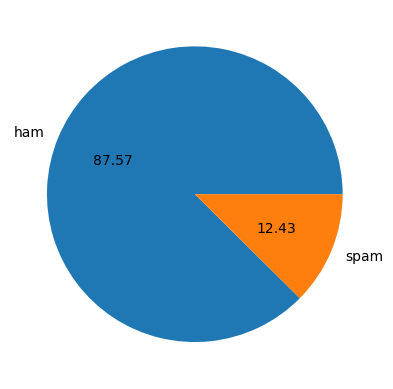

In [12]:
plt.pie(data['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()        

In [13]:
#  we can say data is imbalance


In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\malay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# fetch no of character in a messege
data['num_char']=data['Message'].apply(len)

C:\Users\malay\AppData\Local\Temp\ipykernel_11772\1162909758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_char']=data['Message'].apply(len)


In [16]:
data.sample(2)

,Category,Message,num_char
5139,0,Oh shut it. Omg yesterday I had a dream that I...,228
2853,0,how tall are you princess?,26


In [17]:
# fetch no. of word in a messeng
data['num_word']=data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\malay\AppData\Local\Temp\ipykernel_11772\1034609786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_word']=data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [18]:
data.head()

,Category,Message,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
# fetch sentenses
data['num_sentences']=data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\malay\AppData\Local\Temp\ipykernel_11772\3515303970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentences']=data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [20]:
data.head()

,Category,Message,num_char,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
data.describe()

,Category,num_char,num_word,num_sentences
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [22]:
import seaborn as sns